In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw


In [3]:
# Create blank canvas with zero alpha channel
w, h = (800, 600)
image = Image.new('RGBA', (w, h), (0, 0, 0, 0))

polygon = [(500, 50), (650, 250), (775, 150), (700, 25)]
point1 = (700, 25)
point2 = (650, 250)
color1 = (255, 255, 0)
color2 = (0, 0, 255)

In [4]:
def linear_gradient(i, poly, p1, p2, c1, c2):

    # Draw initial polygon, alpha channel only, on an empty canvas of image size
    ii = Image.new('RGBA', i.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(ii)
    draw.polygon(poly, fill=(0, 0, 0, 255), outline=None)

    # Calculate angle between point 1 and 2
    p1 = np.array(p1)
    p2 = np.array(p2)
    angle = np.arctan2(p2[1] - p1[1], p2[0] - p1[0]) / np.pi * 180

    # Rotate and crop shape
    temp = ii.rotate(angle, expand=True)
    temp = temp.crop(temp.getbbox())
    wt, ht = temp.size

    # Create gradient from color 1 to 2 of appropriate size
    gradient = np.linspace(c1, c2, wt, True).astype(np.uint8)
    gradient = np.tile(gradient, [2 * h, 1, 1])
    gradient = Image.fromarray(gradient)

    # Paste gradient on blank canvas of sufficient size
    temp = Image.new('RGBA', (max(i.size[0], gradient.size[0]),
                              max(i.size[1], gradient.size[1])), (0, 0, 0, 0))
    temp.paste(gradient)
    gradient = temp

    # Rotate and translate gradient appropriately
    x = np.sin(angle * np.pi / 180) * ht
    y = np.cos(angle * np.pi / 180) * ht
    gradient = gradient.rotate(-angle, center=(0, 0),
                               translate=(p1[0] + x, p1[1] - y))

    # Paste gradient on temporary image
    ii.paste(gradient.crop((0, 0, ii.size[0], ii.size[1])), mask=ii)

    # Paste temporary image on actual image
    i.paste(ii, mask=ii)

    return i

In [5]:
image = linear_gradient(image, polygon, point1, point2, color1, color2)

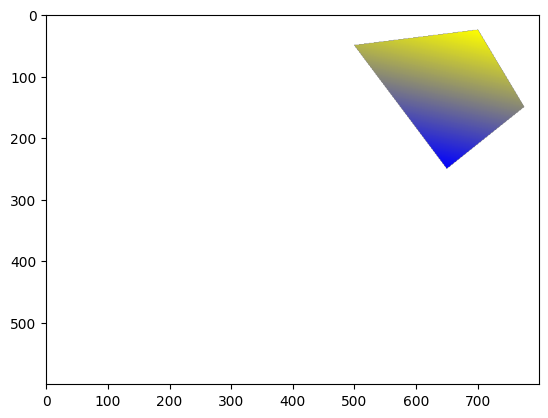

In [6]:
plt.imshow(image)
plt.show()